# **Customer Segmentation using Machine Learning Algorithms**

#### Overview
1. Import libraries
2. Load dataset
3. Clean the dataset
4. Exploratory data analysis 
5. Data preprocessing
6. Train model
7. Save Model

-----

### **<p style="color:  #4ceae5 ">Import Libraries</p>**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import datetime
import math
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

### **<p style="color:  #4ceae5 ">Load The Dataset</p>**

In [5]:
df = pd.read_excel('data/online_retail.xlsx')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### **<p style="color:  #4ceae5 ">Clean The Dataset</p>**

### **<p style="color:  #4ceae5 ">EDA (Exploratory Data Analysis)</p>**

In [6]:
print(df.shape)
df.info()
df.describe(include='all')

(525461, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461.0,525461,522533,525461.000000,525461,525461.000000,417534.000000,525461
unique,28816.0,4632,4681,NaN,25296,NaN,NaN,40
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,675.0,3516,3549,NaN,675,NaN,NaN,485852
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-09 20:01:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.337667,NaN,4.688834,15360.645478,NaN
std,NaN,NaN,NaN,107.424110,NaN,146.126914,1680.811316,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13983.000000,NaN


In [7]:
mv_info = pd.DataFrame(df.isna().sum(), columns={'Number of MV'}) #MV = Missing Value
mv_info['% MV'] = (df.isna().sum() / df.shape[0]) * 100
mv_info

,Number of MV,% MV
Invoice,0,0.000000
StockCode,0,0.000000
Description,2928,0.557225
Quantity,0,0.000000
InvoiceDate,0,0.000000
Price,0,0.000000
Customer ID,107927,20.539488
Country,0,0.000000


In [8]:
df.dropna(axis = 0, inplace = True)

mv_info = pd.DataFrame(df.isna().sum(), columns={'Number of MV'})
mv_info

,Number of MV
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [9]:
df.duplicated().sum() #Number of duplicate on our dataset

6771

In [10]:
df.drop_duplicates(inplace=True) #Dropping those duplicates from our dataset
df.duplicated().sum()

0

In [11]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [12]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,410763.0,410763,410763,410763.000000,410763,410763.000000,410763.000000,410763
unique,23587.0,4031,4459,NaN,21786,NaN,NaN,37
top,500356.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-03-07 15:34:00,NaN,NaN,United Kingdom
freq,251.0,3199,3199,NaN,251,NaN,NaN,372705
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-09 20:01:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.923735,NaN,3.908358,15353.621857,NaN
std,NaN,NaN,NaN,102.039550,NaN,71.714794,1681.657665,NaN
min,NaN,NaN,NaN,-9360.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13979.000000,NaN


In [13]:
print(Counter(df['Country']))

Counter({'United Kingdom': 372705, 'EIRE': 8705, 'Germany': 8120, 'France': 5692, 'Netherlands': 2768, 'Spain': 1271, 'Switzerland': 1187, 'Belgium': 1053, 'Portugal': 1023, 'Channel Islands': 906, 'Sweden': 882, 'Italy': 729, 'Australia': 654, 'Cyprus': 546, 'Austria': 537, 'Greece': 517, 'Denmark': 428, 'Norway': 369, 'Finland': 354, 'United Arab Emirates': 318, 'Unspecified': 280, 'USA': 244, 'Japan': 224, 'Poland': 194, 'Malta': 172, 'Lithuania': 154, 'Singapore': 117, 'Canada': 77, 'Thailand': 76, 'Israel': 74, 'Iceland': 71, 'RSA': 65, 'Korea': 63, 'Brazil': 62, 'West Indies': 54, 'Bahrain': 42, 'Nigeria': 30})


In [14]:
df['canceled_order'] = df['Quantity'].apply(lambda x:int (x < 0)) #Using lambda function to spot canceled order
df['canceled_order'].value_counts()

0    400947
1      9816
Name: canceled_order, dtype: int64

In [15]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,canceled_order
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0


In [16]:
df = df[~(df['canceled_order']>0)] #Excluding canceled orders
df.shape

(400947, 9)

In [17]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,canceled_order
count,400947.0,400947,400947,400947.000000,400947,400947.000000,400947.000000,400947,400947.0
unique,19215.0,4017,4444,NaN,18010,NaN,NaN,37,NaN
top,500356.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-03-07 15:34:00,NaN,NaN,United Kingdom,NaN
freq,251.0,3107,3107,NaN,251,NaN,NaN,364255,NaN
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-09 20:01:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.768523,NaN,3.305571,15361.454639,NaN,0.0
std,NaN,NaN,NaN,97.639816,NaN,35.046376,1680.669487,NaN,0.0
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN,0.0
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13985.000000,NaN,0.0


In [19]:
v = df['Price'] <= 0 
v.value_counts()

False    400916
True         31
Name: Price, dtype: int64

In [21]:
df.loc[df['Price'].values <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,canceled_order
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom,0
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom,0
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom,0
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom,0
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom,0
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom,0
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium,0
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom,0


In [23]:
df = df[~(df['Price']<=0)]
df.shape

(400916, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x29f380690a0>,
 'caps': [<matplotlib.lines.Line2D at 0x29f3807ca90>,
 'boxes': [<matplotlib.lines.Line2D at 0x29f3807c340>],
 'medians': [<matplotlib.lines.Line2D at 0x29f38076070>],
 'fliers': [<matplotlib.lines.Line2D at 0x29f38076340>],
 'means': []}

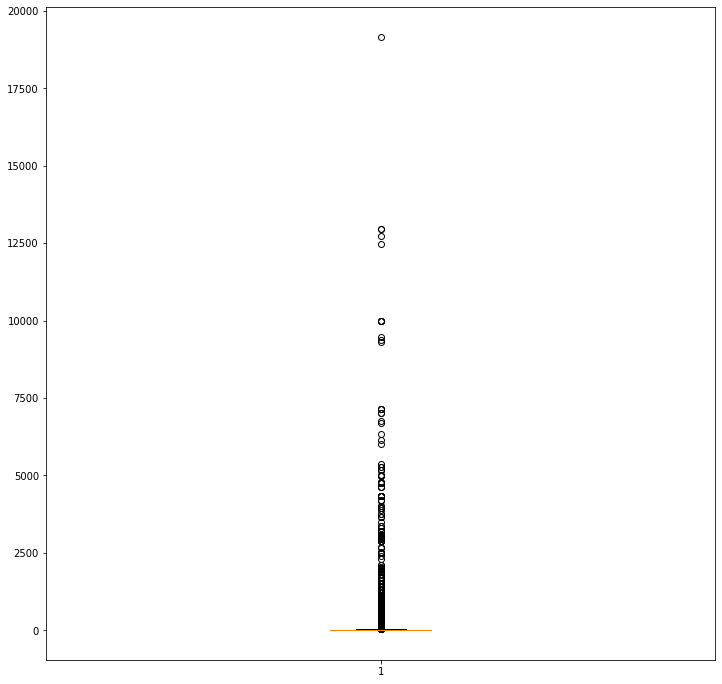

In [24]:
plt.figure(figsize=(12,12))
plt.boxplot(df['Quantity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29f304d8c40>,
 'caps': [<matplotlib.lines.Line2D at 0x29f304fe220>,
 'boxes': [<matplotlib.lines.Line2D at 0x29f304d8970>],
 'medians': [<matplotlib.lines.Line2D at 0x29f304fe7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29f304fea90>],
 'means': []}

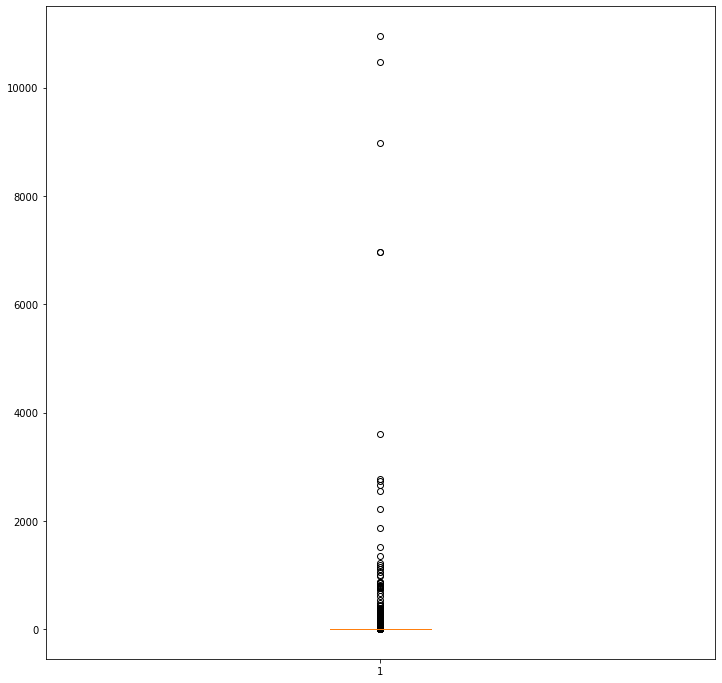

In [26]:
plt.figure(figsize=(12,12))
plt.boxplot(df['Price'])

In [28]:
df['amount'] = df['Quantity'] * df['Price'] # 
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,canceled_order,amount
count,400916.0,400916,400916,400916.000000,400916,400916.000000,400916.000000,400916,400916.0,400916.000000
unique,19213.0,4017,4444,NaN,18008,NaN,NaN,37,NaN,NaN
top,500356.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-03-07 15:34:00,NaN,NaN,United Kingdom,NaN,NaN
freq,251.0,3107,3107,NaN,251,NaN,NaN,364233,NaN,NaN
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-09 20:01:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.767418,NaN,3.305826,15361.544074,NaN,0.0,21.945330
std,NaN,NaN,NaN,97.638385,NaN,35.047719,1680.635823,NaN,0.0,77.758075
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN,0.0,0.001000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13985.000000,NaN,0.0,5.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x29f32630c40>,
 'caps': [<matplotlib.lines.Line2D at 0x29f32610220>,
 'boxes': [<matplotlib.lines.Line2D at 0x29f32630970>],
 'medians': [<matplotlib.lines.Line2D at 0x29f326107c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29f32610a90>],
 'means': []}

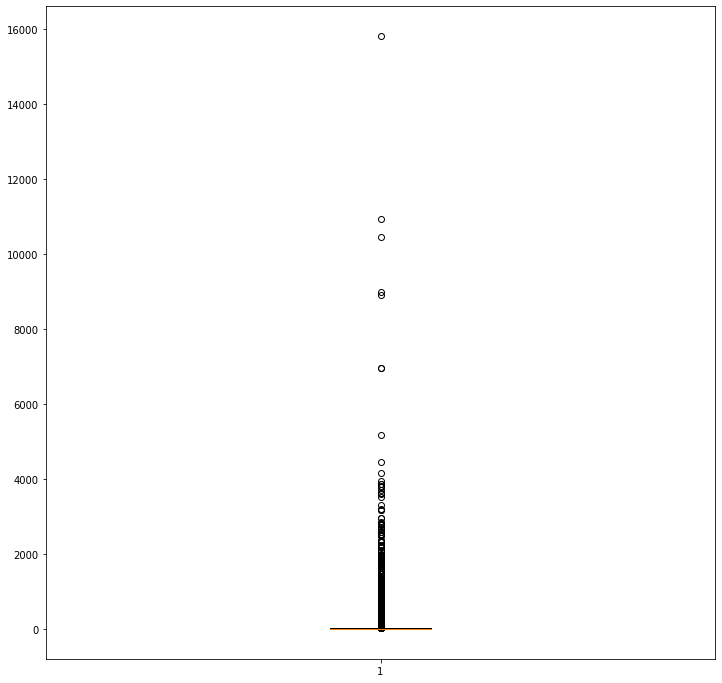

In [29]:
plt.figure(figsize=(12,12))
plt.boxplot(df['amount']) #Using boxplot to spot outliers from amount column in dataset

In [30]:
drop_amount = df['amount']>6000 #Deciding that every value above 6000 would be considered as an outlier
drop_amount.value_counts()

False    400909
True          7
Name: amount, dtype: int64

In [31]:
df = df[~(df['amount']>6000)] #Dropping outliers
df.shape

(400909, 10)

### Building New Data Frame

##### As been told before that RFM (Recence, Frequency, and Monetary) method would be used to measure customers' loyalty in this project, new data frame must be built in order to do that. It only requires Customer ID, Invoice Date, and Amount column from the previous data frame to build new one.

In [33]:
df['Customer ID'].unique().shape

(4310,)

In [36]:
data = { 'Customer ID'  : df['Customer ID'],
         'Invoice Date' : df['InvoiceDate'],
         'Amount'       : df['amount']    
        }

df_new = pd.DataFrame(data)
df_new

,Customer ID,Invoice Date,Amount
0,13085.0,2009-12-01 07:45:00,83.40
1,13085.0,2009-12-01 07:45:00,81.00
2,13085.0,2009-12-01 07:45:00,81.00
3,13085.0,2009-12-01 07:45:00,100.80
4,13085.0,2009-12-01 07:45:00,30.00
...,...,...,...
525456,17530.0,2010-12-09 20:01:00,5.90
525457,17530.0,2010-12-09 20:01:00,3.75
525458,17530.0,2010-12-09 20:01:00,3.75
525459,17530.0,2010-12-09 20:01:00,7.50


### Adding Frequency Features

##### Frequency refers to the number of products that a customer bought

In [37]:
df2 = df_new.groupby(df_new['Customer ID']).count().reset_index() 
df3 = df2.drop(['Amount'],axis=1)                               
df4 = df3.rename(columns={'Invoice Date':'Frequency'})
df4

,Customer ID,Frequency
0,12346.0,33
1,12347.0,71
2,12348.0,20
3,12349.0,102
4,12351.0,21
...,...,...
4305,18283.0,217
4306,18284.0,28
4307,18285.0,12
4308,18286.0,67


### Adding Recency Features

##### Recency refers to the last day the customer made transaction

In [38]:
ref_date = df_new['Invoice Date'].max()
ref_date = ref_date+ datetime.timedelta(days=1)
ref_date

Timestamp('2010-12-10 20:01:00')

In [39]:
df_new['days_since_last_purchase'] = ref_date - df_new['Invoice Date']
df_new['days_since_last_purchase_num'] = df_new['days_since_last_purchase'].astype('timedelta64[D]')

df5 = df_new.groupby("Customer ID").min().reset_index()[['Customer ID', 'days_since_last_purchase_num', 'Amount']]
df5.rename(columns={'days_since_last_purchase_num':'Recency'},inplace=True)
df5

,Customer ID,Recency,Amount
0,12346.0,165.0,1.00
1,12347.0,3.0,7.80
2,12348.0,74.0,1.00
3,12349.0,43.0,7.80
4,12351.0,11.0,9.90
...,...,...,...
4305,18283.0,18.0,0.21
4306,18284.0,67.0,6.30
4307,18285.0,296.0,7.80
4308,18286.0,112.0,7.50


### Final Data Frame

In [40]:
df6 = pd.merge(df4, df5)
df6

,Customer ID,Frequency,Recency,Amount
0,12346.0,33,165.0,1.00
1,12347.0,71,3.0,7.80
2,12348.0,20,74.0,1.00
3,12349.0,102,43.0,7.80
4,12351.0,21,11.0,9.90
...,...,...,...,...
4305,18283.0,217,18.0,0.21
4306,18284.0,28,67.0,6.30
4307,18285.0,12,296.0,7.80
4308,18286.0,67,112.0,7.50


In [41]:
df6.describe(include='all')

,Customer ID,Frequency,Recency,Amount
count,4310.000000,4310.000000,4310.000000,4310.000000
mean,15349.759165,93.018329,91.091647,13.083933
std,1701.180215,198.945816,96.811491,65.934166
min,12346.000000,1.000000,1.000000,0.001000
25%,13883.250000,18.000000,18.000000,0.950000
50%,15350.500000,43.000000,53.000000,5.040000
75%,16834.750000,100.000000,136.000000,10.080000
max,18287.000000,5568.000000,374.000000,2803.200000


### Vizualizing Our New Data Frame

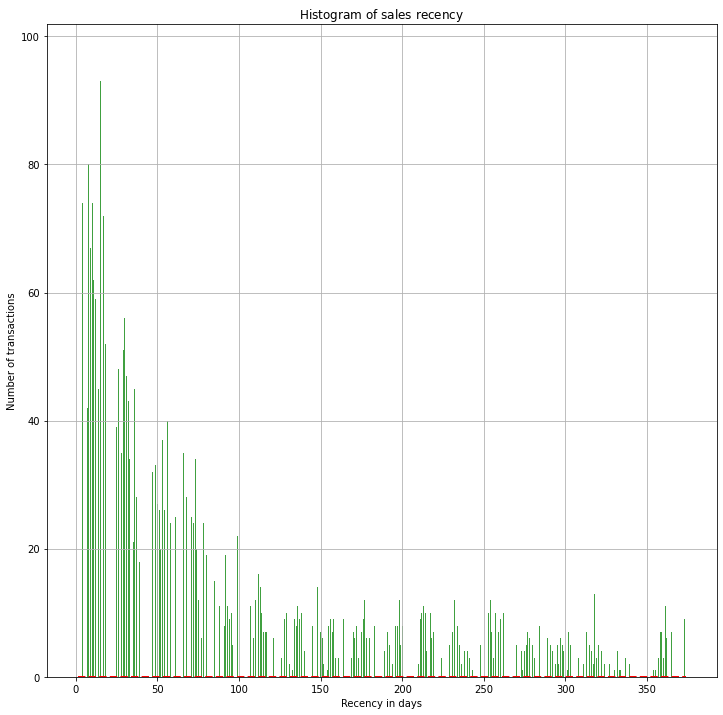

In [42]:
plt.figure(figsize=(12,12))

x = df6['Recency']
mu = np.mean(df6['Recency'])
sigma = math.sqrt(np.var(df6['Recency']))
n, bins, patches = plt.hist(x, 1000, facecolor='green', alpha=0.75) 

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

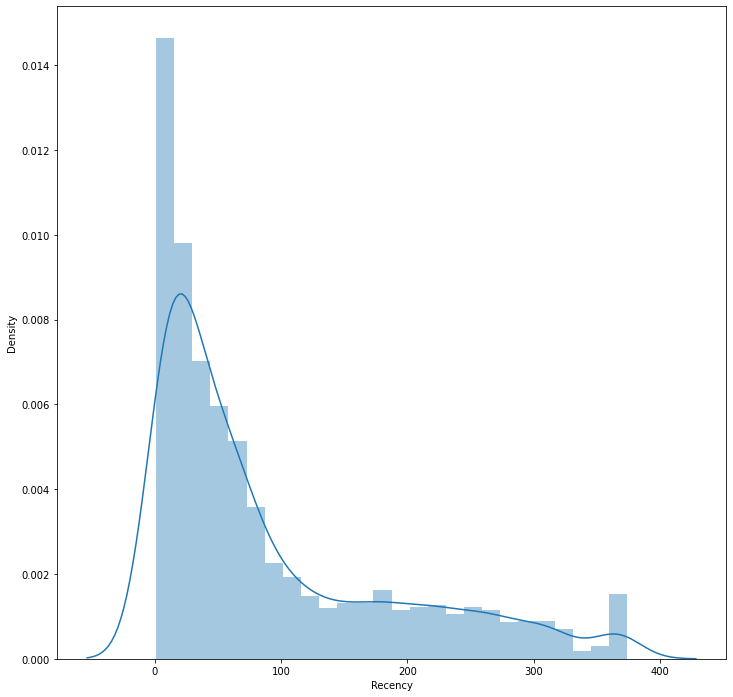

In [43]:
plt.figure(figsize=(12,12))
sns.distplot(df6['Recency'])

### **<p style="color:  #4ceae5 ">Data Preprocessing</p>**

In [45]:
from sklearn import preprocessing

df6['recency_log'] = df6['Recency'].apply(math.log)
df6['frequency_log'] = df6['Frequency'].apply(math.log)
df6['amount_log'] = df6['Amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']

X = df6[feature_vector]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

<AxesSubplot:xlabel='amount_log', ylabel='Density'>

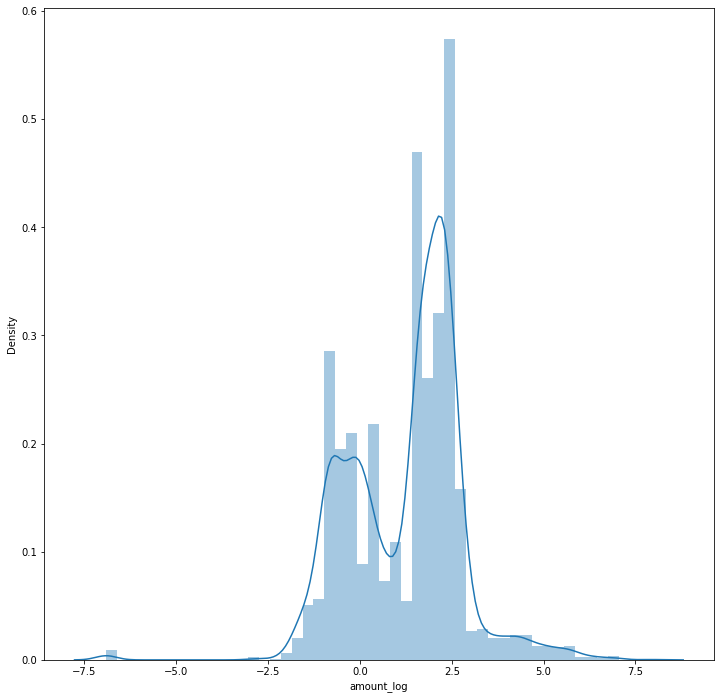

In [46]:
plt.figure(figsize=(12,12))
sns.distplot(df6['amount_log'])

Text(0.5, 0, 'Monetary')

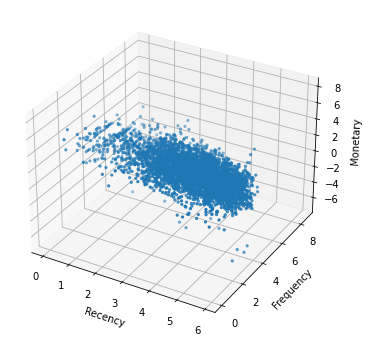

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax  = fig.add_subplot(111, projection='3d')
xs  = df6.recency_log
ys  = df6.frequency_log
zs  = df6.amount_log

ax.scatter(xs, ys, zs, s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

### **<p style="color:  #4ceae5 ">Train & Evaluate The Model</p>**

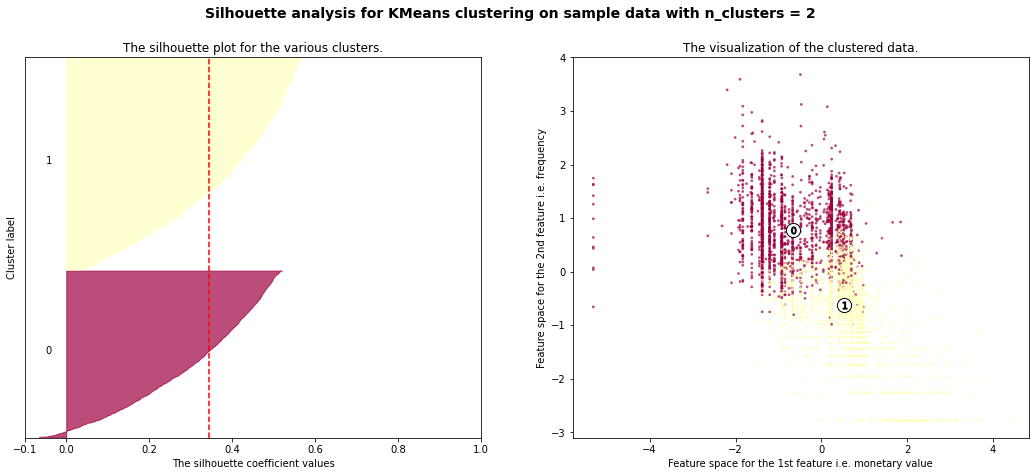

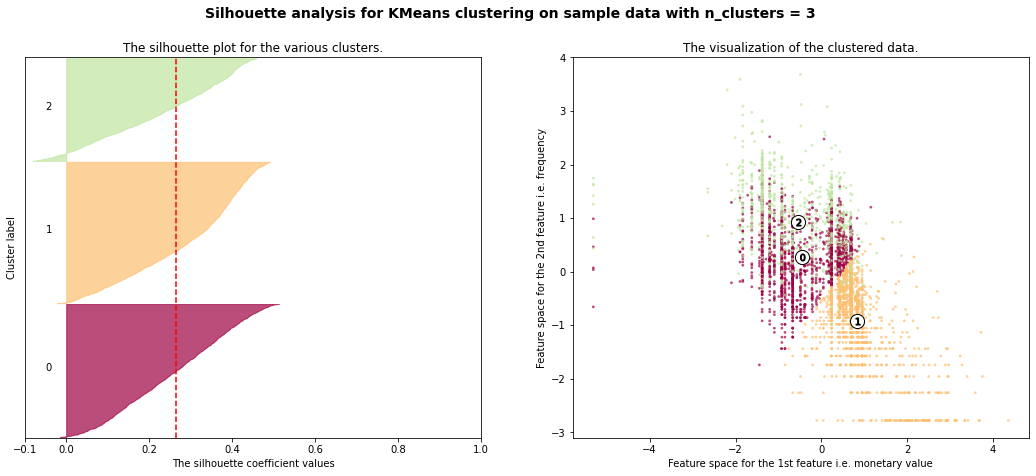

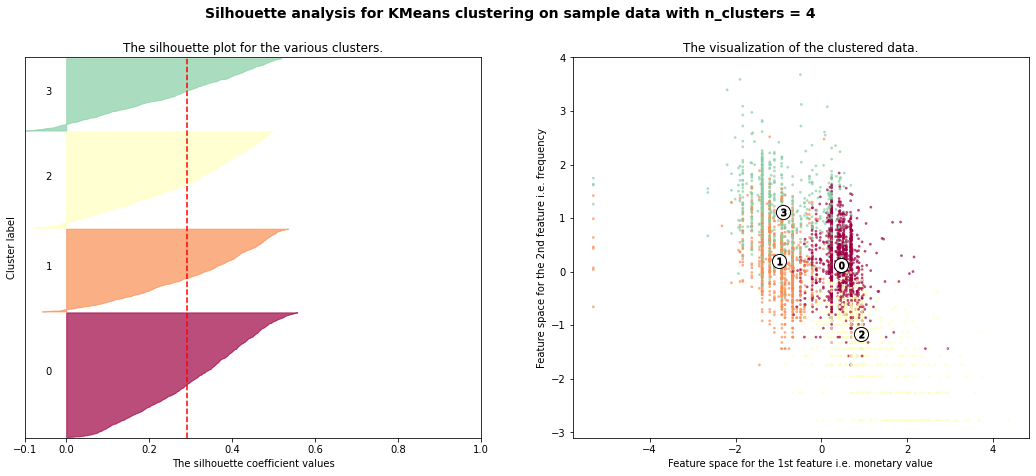

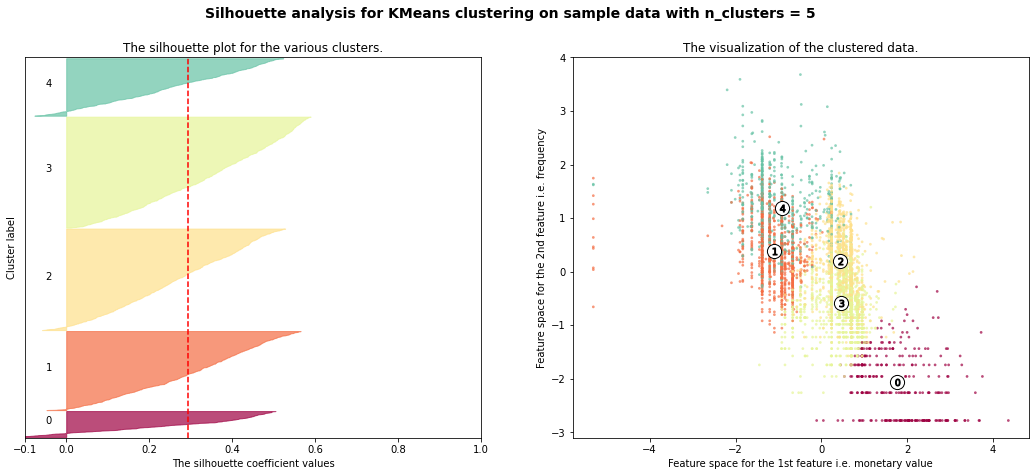

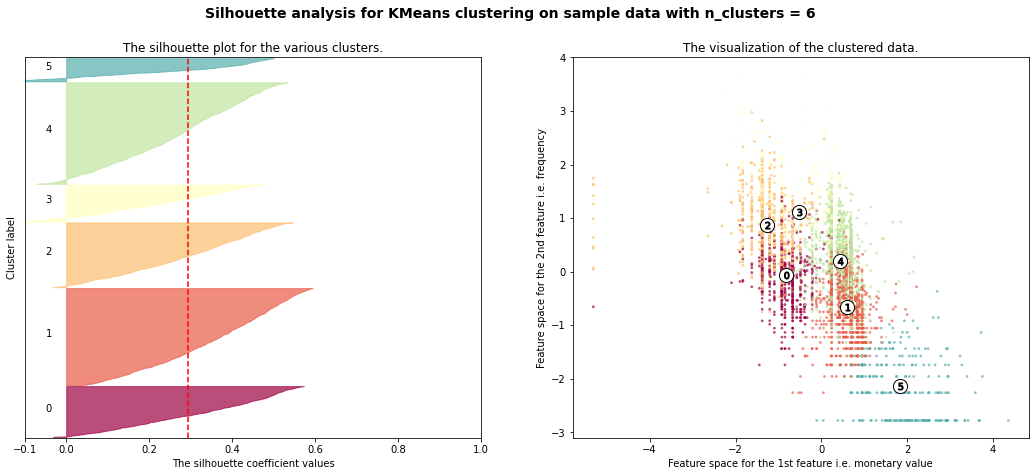

In [48]:

X = X_scaled

cluster_centers = dict()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("Spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.get_cmap("Spectral")(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [49]:
wcss = [] #Elbow method can be als used to determine the best number of cluster for our data

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
wcss

[12930.000000000002,
 7863.815231207398,
 6321.846464810139,
 5122.992126449129,
 4322.164318950683,
 3804.651725823462,
 3339.8042872791198,
 3012.400223903772,
 2790.222948170743]

Text(0, 0.5, 'WCSS')

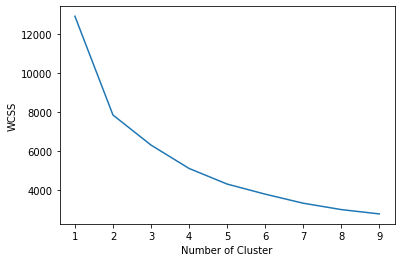

In [50]:
plt.figure()
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

In [51]:
for i in range_n_clusters:
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 2 number of clusters
   amount_log  recency_log  frequency_log
0    1.275987    17.630624     116.825092
1    7.741725    92.224979      17.919701
Silhouette score for cluster 2 is 0.3439721512171156

for 3 number of clusters
   amount_log  recency_log  frequency_log
0    1.719764    82.338498      58.581323
1   12.698012    83.248235      11.948656
2    1.496710     8.380635     139.907879
Silhouette score for cluster 3 is 0.2643356043612672

for 4 number of clusters
   amount_log  recency_log  frequency_log
0    7.030186    33.240716      48.091860
1    0.775381    96.406809      53.595863
2   14.384077   131.515732       8.696757
3    0.898286     7.171379     178.840691
Silhouette score for cluster 4 is 0.29054498755360303

for 5 number of clusters
   amount_log  recency_log  frequency_log
0   51.778055    87.539356       2.635580
1    0.637318    74.431024      69.063479
2    6.792716    22.402852      53.233557
3    7.113529   138.745838      18.605706
4    0.845146     6.045

## Deciding The Number of Cluster 

##### From the Silhouette score, it can be seen that the number of cluster that has high score is 2 and 3. In parallel, from the elbow method, it can be seen that 2 and 3 are the best fit number of cluster. Thus, 2 and 3 number of clusters are going to be used. But, it is more effective to use 3 number of clusters, 2 clusters more likely classification task.

In [52]:
labels = cluster_centers[2]['labels']   
df6['num_cluster2_labels'] = labels
labels = cluster_centers[3]['labels']
df6['num_cluster3_labels'] = labels

In [53]:
df6

,Customer ID,Frequency,Recency,Amount,recency_log,frequency_log,amount_log,num_cluster2_labels,num_cluster3_labels
0,12346.0,33,165.0,1.00,5.105945,3.496508,0.000000,1,0
1,12347.0,71,3.0,7.80,1.098612,4.262680,2.054124,0,2
2,12348.0,20,74.0,1.00,4.304065,2.995732,0.000000,1,0
3,12349.0,102,43.0,7.80,3.761200,4.624973,2.054124,0,0
4,12351.0,21,11.0,9.90,2.397895,3.044522,2.292535,1,1
...,...,...,...,...,...,...,...,...,...
4305,18283.0,217,18.0,0.21,2.890372,5.379897,-1.560648,0,2
4306,18284.0,28,67.0,6.30,4.204693,3.332205,1.840550,1,1
4307,18285.0,12,296.0,7.80,5.690359,2.484907,2.054124,1,1
4308,18286.0,67,112.0,7.50,4.718499,4.204693,2.014903,1,0


### **<p style="color:  #4ceae5 ">Save The Model</p>**